# Plotting a NDDataset

<div class='alert alert-info'>

**NOTE** : By default, all matplolib figures will be plotted **inline** in this notebook. 
to change this behaviour, uncomment (which means: remove the #) the next line (which must be placed before importing the  ``spectrochempy.api`` library!

</div>

In [1]:
from spectrochempy import *

"<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAABgAAAAYCAYAAADgdz34AAAAAXNSR0IArs4c6QAAAAlw SFlzAAAJOgAACToB8GSSSgAAAetpVFh0WE1MOmNvbS5hZG9iZS54bXAAAAAAADx4OnhtcG1ldGEgeG1sbnM6eD0iYWRvYmU6bnM6 bWV0YS8iIHg6eG1wdGs9IlhNUCBDb3JlIDUuNC4wIj4KICAgPHJkZjpSREYgeG1sbnM6cmRmPSJodHRwOi8vd3d3LnczLm9yZy8x OTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjIj4KICAgICAgPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9IiIKICAgICAgICAgICAg eG1sbnM6eG1wPSJodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvIgogICAgICAgICAgICB4bWxuczp0aWZmPSJodHRwOi8vbnMu YWRvYmUuY29tL3RpZmYvMS4wLyI+CiAgICAgICAgIDx4bXA6Q3JlYXRvclRvb2w+bWF0cGxvdGxpYiB2ZXJzaW9uIDIuMS4wLCBo dHRwOi8vbWF0cGxvdGxpYi5vcmcvPC94bXA6Q3JlYXRvclRvb2w+CiAgICAgICAgIDx0aWZmOk9yaWVudGF0aW9uPjE8L3RpZmY6 T3JpZW50YXRpb24+CiAgICAgIDwvcmRmOkRlc2NyaXB0aW9uPgogICA8L3JkZjpSREY+CjwveDp4bXBtZXRhPgqNQaNYAAAGiUlE QVRIDY1We4xU1Rn/3XPuYx47u8w+hnU38hTcuoUEt/6D2y4RB0ME1BoEd9taJaKh9CFiN7YGp7appUAMNmktMZFoJTYVLVQ0smsy 26CN0SU1QgsuFAaW3WVmx33N677O6XfuyoIxTXqSO/fec+75fd93vt/3/UbDV0aKSZmCpkFMLz3T9utuu2N+o98aDSMBKVAo89z5 y+zEz3ZafcCOfvWdlGCalqKn1Bf71CygTd+mf1esSOnpdMpTb+vWpTZuWVfe3jLPa5tzHYNm0T5N0gpdkkHaDBeGBU6d1/t/fyS8 +/CbqdfUvmsx1PuMgc2bNxv79u1zgd31r+7JH1jbIZKxWRXAcYUQ8IWvBfBXNjEuJWPgMA02NR7C3/pYT9fjdZ3A9tGrWF8YSJHn qcDz3y7q2T967PZv+gnYJdd1mEZ+62zGDQV/dQgKhmLzDNOXCEWM3j6eTT5Y3w78dOBKJLR1PQf+4ivPj76UPZnssBN+wbM9Aet/ AV81Mf1EEULXYfOobvX2WWQk0aoioXwwSmirOlioY0mu8BIouzYl7P8GV3vpqCCEZvlFz769w08oLDWvyKIyL1asSm28d6WfzA97 ztvvV1kexUMsmhlkULEkuGYmFYC6AvfUrITnwUKl5K79lkjeSSRRTCTbQPd95e1WzMbZSya74XoXAxctCllCnbECMOjZNGRwvzIX nD85wbkMmKK+U045Dtdi8Qp+SAxU2GTg2bYlC9224pgvmSb54vkVTBQYyhUt2KjAMyMmPjwRQW5Mh2WKwJhlBh6jVGagFM84wZnQ 4bpC0Rt4pk1PbSt0NDcxDA5xryosDHWgtbM0DGZDWLSoiDMDYeQnGVrmOThxLozB0RAaahzkJzjKNqcIQBymJFMkOlN8Dqjpg0XY Tx5xO/QbmmUrqIjGJznq47TqTaClKYfjp+PInLMwnOdYvtQBZ2XcunQY+VwIo4U4muoFEjVEFE6lQyEUKzHYfgQG9ylCyngU+Cxj tOqxCDGHcCsOMCs6iQul5ZiStdATYxjMZXDLTUVwLY8Jey4uOh2IxjwsrP8UXJYxUrkZrghBahzV5iXU6gNkq0Z1EzIsUBUSCV2n EOHo0LVxHCpuxabJJdhi5PFnvw5vLXwXIfNZvD/+JNo/X40NegE54sUaazl+UL8XD1x+FB9Ijjt4EQfdGN6J/x131LwIV9ap/AYs 0x1fz1ZKFbh6A7qKy/By9Dg6G36Ep91vUJJ15Cqr0Z67E8/HzmBrw1OwxWyM+3Mo6BAuSB17oyfx0Oyl2DN0Hqs/70Cx6hBCvESF UY1ShWXZZEE7OTAYxZzaPH4TuoiusZvRnunFy2NbiHYuBp2vB66srX4vMEjpRKPxKXmnoQ4+Mn4DPiv8CYcrs3GfNUXJLtM+alSO hrMj/KT+wBNW3+E/2liywNO3iSflbaFva/+stGDTxE0E9Sjaox8HBhxpEamzMGSEaFKg+mjEddzDh1MxTDq3YV1kGBsjfwW3S9Cq anjmko+ndlb1UR3s6K8JlfphNWq9Ew/7c61T2BB/EbcaNkb8GBaE0tANH7/M34PLdhJDzjIcL9xPbdTG6zyM72Y+wXPHmvB489No fm0b5HnbQ9Rgp/7DSSd29AeVvPeNyK6JcYl/yQVi5dBjuGvoV/gaJe47s45QUxrDmcYX0MBsdF7egvXZ7+O0vZA4X8QmOQWjlSK7 RDz5wIM30gp9UbWcGjXxhzdDu1SiNSpx6kcQB57rPnr/3dlkZarWLnlRq5oPET1dOCIOk4wALib9eeS5iygfhkd09H0DWphB/+gs +PcOAS+ssrFmmXXgVfR0de9cpbAJfH3Q1jofW9DZk56dDcVsq9YcsoUMEd1qyLoT3BX1YiyHMJuk97hyjqIoE91t+NcTLeN0ZrfM oXatZbu6G0h4VG+ibqq0IJVK6cAjo6serG3vSUezCMct0yQeSOFJSUImqb2qbknUpDqlZxE0QZ+ZUpSlZx79h4Nda6zef9dlk121 JDjbR5XggPRZlRnS6bRQRtLpn4++cuie/Yvn2svmNxuLw9WCcYIl4fEoTEGiSTUqJdfgU+8ROqf1iMkLzS389YtNPXc/PH8l8ONB JZkHD+4JtD04HmVEDWWErmBhzV2/2LB1bemJG6krzv2S6NOHUgtEP0Oif5pE/3fHoruP7N8RiP61GArzSwbUhJJQpXJKiKbfr/3b IhKq76sKPUdF9NW/LSqfSn6vjv8C45H/6FSgvZQAAAAASUVORK5CYII=' style='height:25px; border-radius:12px; display: inline-block; float: left; vertical-align: middle'>",SpectroChemPy's API - v.0.1a13.dev1+g9ab88ea.d20190320© Copyright 2014-2019 - A.Travert & C.Fernandez @ LCS


Let's first import a NDDataset from a file:

In [2]:
import os
dataset = NDDataset.read_omnic(os.path.join('irdata', 'NH4Y-activation.SPG'))
print(dataset.description)

Dataset from spg file : NH4Y-activation.SPG 
History of the 1st spectrum: vz0521.spa, Thu Jul 07 06:10:41 2016 (GMT+02:00)


To plot a dataset, use the `plot` command (generic plot). As the current NDDataset is 2D, a contour plot is displayed by default.

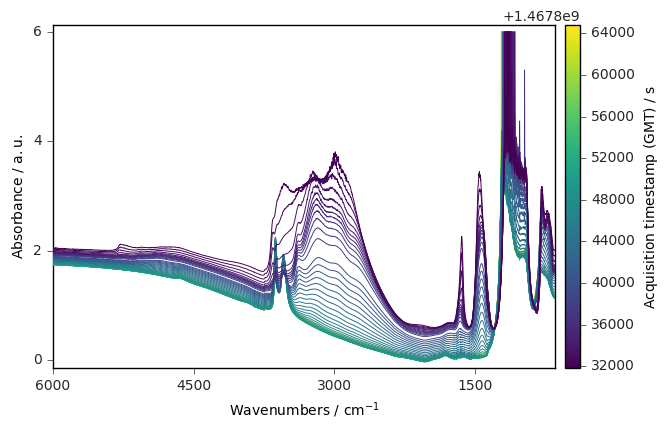

In [3]:
_ = dataset.plot(colorbar=True) # plot the source.  

In [4]:
#import matplotlib as mpl
#mpl.rcParams

The plot function return a reference to the subplot on which the data have been plotted.
We can then use this reference to modify some element of the plot.

For example, here we add a title:

In [5]:
title = dataset.ax.set_title('NH$_4$Y IR spectra during activation')
title.set_color('magenta')
title.set_fontstyle('italic')
title.set_fontsize(16)

Note that by default, *sans-serif* font are used for all text in the figure. 

But if you prefer, *serif* font can be used instead. The easiest way to do this is to change the plot style:

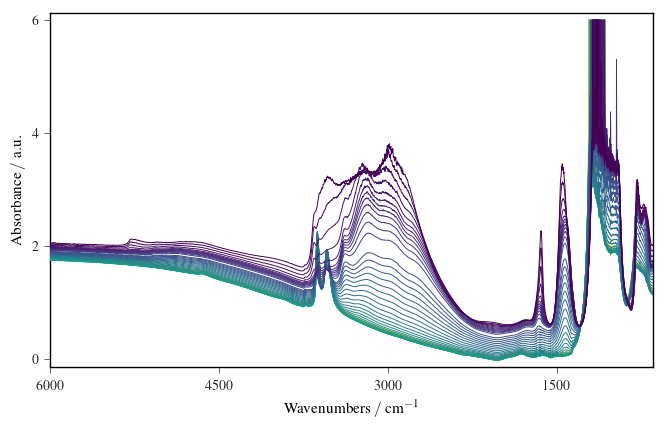

In [6]:
_ = dataset.plot(style='serif')

Other styles are :
* paper , which create figure suitable for two columns article (fig width: 3.4 inch)
* poster
* talk
* grayscale

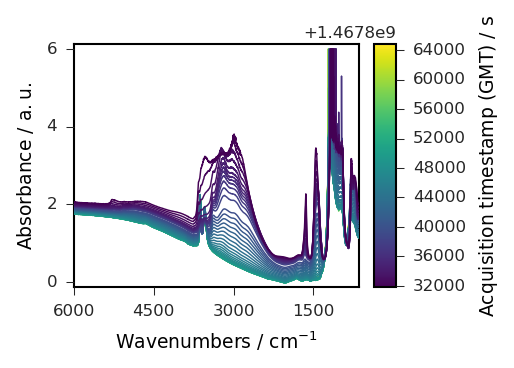

In [7]:
_ = dataset.plot(style='paper', colorbar=True)

To get a list of all available styles :

In [8]:
available_styles()

['seaborn-notebook',
 'seaborn-pastel',
 'notebook',
 'grayscale',
 'fast',
 'poster',
 'seaborn-white',
 'classic',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-paper',
 'grayscale.mplstyle',
 'paper.mplstyle',
 'talk',
 'seaborn-talk',
 'seaborn-deep',
 'seaborn-poster',
 'seaborn-dark',
 'seaborn',
 '_classic_test',
 'sans.mplstyle',
 'Solarize_Light2',
 'ggplot',
 'dark_background',
 'sans',
 'scpy.mplstyle',
 'seaborn-darkgrid',
 'paper',
 'tableau-colorblind10',
 'seaborn-whitegrid',
 'bmh',
 'scpy',
 'serif',
 'poster.mplstyle',
 'fivethirtyeight',
 'seaborn-ticks',
 'serif.mplstyle',
 'notebook.mplstyle',
 'seaborn-bright',
 'talk.mplstyle',
 'seaborn-muted']

these styles can be combined

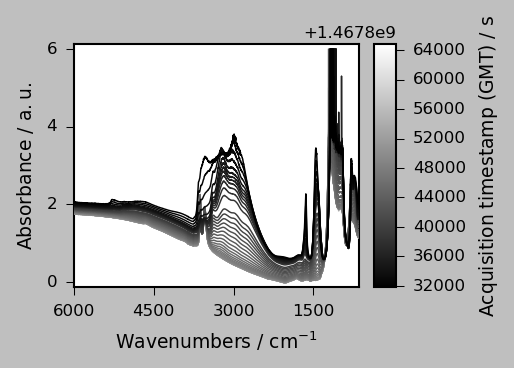

In [9]:
_ = dataset.plot(style=['sans','paper','grayscale'], colorbar=True)

New styles can also be created, using a simple dictionary:

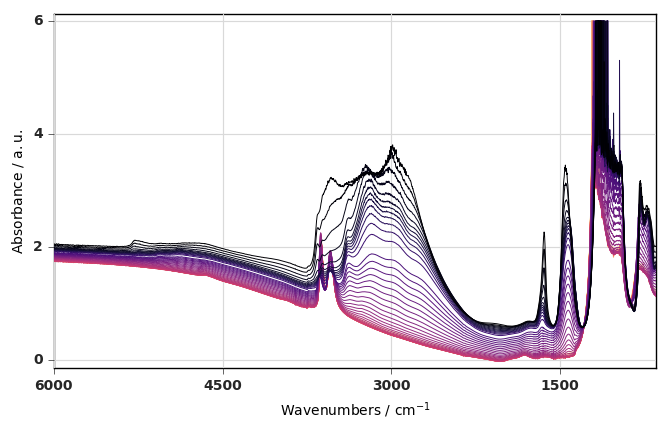

In [10]:
mystyle={'image.cmap':'magma', 
         'font.size':10, 
         'font.weight':'bold', 
         'axes.grid':True}
#TODO: store these styles for further use
_ = dataset.plot(style=mystyle)

To display all entry for definig plot style, uncomment the next line:

In [11]:
#import matplotlib as mpl
#mpl.rcParams

## Changing axis
The `y` axis with timestamp in the above plots is not very informative, lets rescale it in hours and change the origin. 

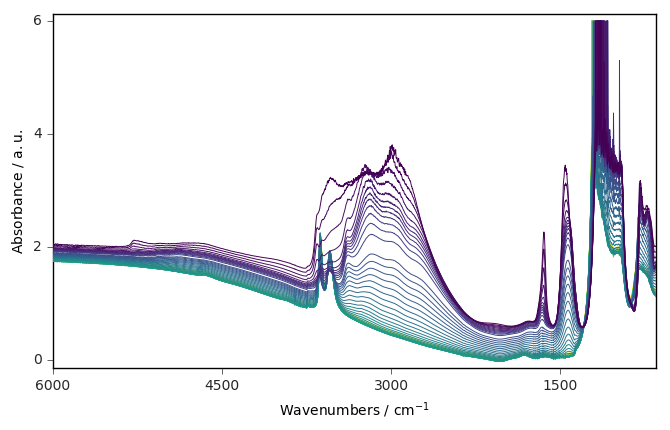

In [12]:
dataset.y -= dataset.y[0]                # change origin
dataset.y.title = u'Aquisition time'    # change the title (default axis label)
dataset.y.to('hour')                    # change unit base
_ = dataset.plot()

By default, plots are done in contour mode.

If you like to have stacked plot, you can use:

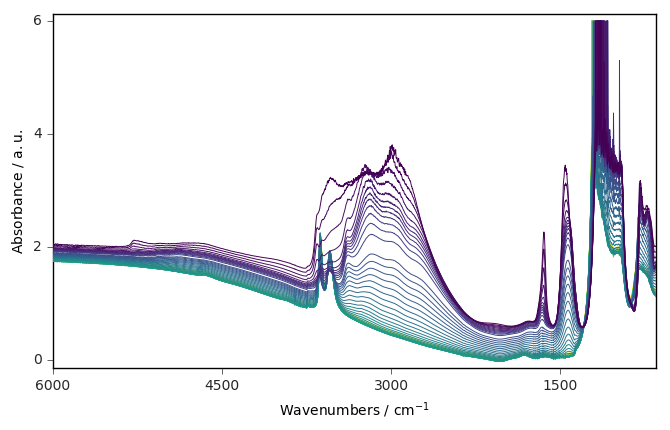

In [13]:
_ = dataset.plot(method='stack', style='sans', colorbar=False)

We can change or add labels to axes after creation of the dataset  #TODO

We can plot several datasets on the same figure

(-1, 9)

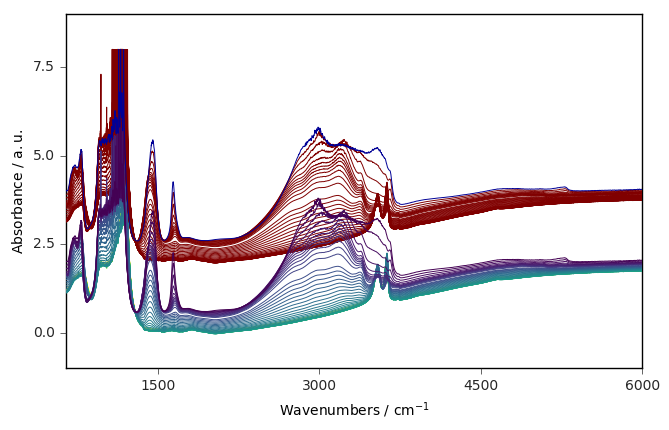

In [14]:
dataset.plot(method='stack', style='sans', colorbar=False)

so = dataset.copy()
so += 2

_ = so.plot(method='stack', colormap='jet', data_only=True, clear=False)
so.ax.set_ylim(-1,9)